## E05 Claculate spatial distribution of predicted water feature:

#### 0. Load required libraries, site dependant constants and utility functions.

In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
import seaborn as sns
import joblib
from sklearn import metrics

# EOLearn libraries:
from eolearn.core import EOTask, EOPatch, LinearWorkflow, LoadTask, SaveTask, FeatureType, EOExecutor
from eolearn.core import OverwritePermission

# Add to python path parent dictionary
import sys
sys.path.append("../../")

# load site dependant constants (HERE YOU CAN CHOOSE DIFFERENT LOCATION)
from aoi_sites import upe_promice_area as site

# load utility functions
from utils import io_functions as io_utils
from utils import plot_functions as plot_utils

#### 1. Load Exemplary LANDSAT EOPatch :

In [2]:
eo_patch = io_utils.load_exemplary_eopatch(data_product='MODIS',date_range = site.DATE_RANGES_MODIS[-2], patch_id=6, random_choice=False)
eo_patch

Loaded from ../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2011_04-2011_11/2975_maxcc_0.05_x-3_y-136


EOPatch(
  data: {
    DATASET: numpy.ndarray(shape=(194, 333, 333, 11), dtype=float32)
    MODIS_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(194, 333, 333, 1), dtype=float32)
    MODIS_NDWI: numpy.ndarray(shape=(194, 333, 333, 1), dtype=float32)
    MODIS_NRB: numpy.ndarray(shape=(194, 333, 333, 1), dtype=float32)
    MODIS_RAW_BANDS: numpy.ndarray(shape=(194, 333, 333, 7), dtype=float32)
  }
  mask: {
    IS_DATA: numpy.ndarray(shape=(194, 333, 333, 1), dtype=bool)
    PREDICTED_WATER_FEATURES: numpy.ndarray(shape=(194, 333, 333, 1), dtype=bool)
  }
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {
    DEM_RAW_LAYER: numpy.ndarray(shape=(333, 333, 1), dtype=float32)
    DEM_SLOPE_LAYER: numpy.ndarray(shape=(333, 333, 1), dtype=float32)
  }
  mask_timeless: {}
  scalar_timeless: {
    PREDICTED_WATER_MASK_COVERAGE: numpy.ndarray(shape=(194,), dtype=uint32)
  }
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    index_x: 3
    index_y: 136
    maxcc: '0.05'
    patch_inde

#### 2. UPE_PROMICE data load:

In [3]:
file_name =  '../../data/aoi/UPE_U_PROMICE_DAILY.xlsx'
sheet = 'UPE_U_PROMICE_DAILY'

import pandas as pd
df = pd.read_excel(io=file_name, sheet_name=sheet)
print(df.head(5))  # print first 5 rows of the dataframe

   Year  MonthOfYear  DayOfMonth  DayOfYear  DayOfCentury  AirPressure(hPa)  \
0  2009            8          18        230          3518            896.88   
1  2009            8          19        231          3519            892.23   
2  2009            8          20        232          3520            891.38   
3  2009            8          21        233          3521            892.62   
4  2009            8          22        234          3522            892.21   

   AirTemperature(C)  AirTemperatureHygroClip(C)  RelativeHumidity(%)  \
0               1.25                        1.02                 83.1   
1               0.41                        0.16                 69.6   
2              -1.08                       -1.22                 65.8   
3              -2.74                       -2.87                 66.7   
4              -1.21                       -1.30                 80.3   

   SpecificHumidity(g/kg)  ...  IceTemperature8(C)  TiltToEast(d)  \
0                

In [106]:
temp_upe_data_2012 =  df[( df.Year == 2012 ) & (df.DayOfYear >= 116) & (df.DayOfYear <= 309) ]

In [107]:
temp_upe_data_2011 =  df[( df.Year == 2011 ) & (df.DayOfYear >= 116) & (df.DayOfYear <= 309) ]
#temp_upe_data[['Year', 'MonthOfYear', 'DayOfMonth']]

In [108]:
temp_upe_data_2010 =  df[( df.Year == 2010 ) & (df.DayOfYear >= 116) & (df.DayOfYear <= 309) ]

In [109]:
temp_upe_data_2009 =  df[( df.Year == 2009 ) & (df.DayOfYear >= 116) & (df.DayOfYear <= 309) ]

In [113]:
temperatures = np.zeros(194)

In [114]:
temperatures

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [115]:
temperatures[-80:] = temp_upe_data_2009['AirTemperature(C)']

In [116]:
temperatures

array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
      

In [127]:
temp_upe_data_2009

,Year,MonthOfYear,DayOfMonth,DayOfYear,DayOfCentury,AirPressure(hPa),AirTemperature(C),AirTemperatureHygroClip(C),RelativeHumidity(%),SpecificHumidity(g/kg),...,IceTemperature8(C),TiltToEast(d),TiltToNorth(d),LatitudeGPS_HDOP<1(degN),LongitudeGPS_HDOP<1(degW),ElevationGPS_HDOP<1(m),HorDilOfPrecGPS_HDOP<1,LoggerTemperature(C),FanCurrent(mA),BatteryVoltage(V)
0,2009,8,18,230,3518,896.88,1.25,1.02,83.1,3.86,...,-6.54,0.31,-0.09,72.891440,53.534897,979.9,0.83,1.60,129.3,13.33
1,2009,8,19,231,3519,892.23,0.41,0.16,69.6,3.07,...,-6.59,0.23,0.14,72.891442,53.534928,980.6,0.83,0.58,131.5,13.31
2,2009,8,20,232,3520,891.38,-1.08,-1.22,65.8,2.60,...,-6.58,0.29,0.12,72.891444,53.534922,980.3,0.86,-0.45,142.0,14.07
3,2009,8,21,233,3521,892.62,-2.74,-2.87,66.7,2.29,...,-6.58,0.33,0.21,72.891445,53.534952,980.3,0.82,-2.13,139.1,14.04
4,2009,8,22,234,3522,892.21,-1.21,-1.30,80.3,3.11,...,-6.58,0.28,0.28,72.891443,53.534975,979.7,0.87,-0.16,135.7,13.82
5,2009,8,23,235,3523,893.87,-2.22,-2.36,65.7,2.33,...,-6.57,0.32,0.22,72.891436,53.534983,979.7,0.85,-1.84,138.8,14.00
6,2009,8,24,236,3524,893.21,-1.28,-1.44,64.8,2.50,...,-6.56,0.29,0.12,72.891432,53.534991,980.5,0.85,-0.98,140.6,13.93
7,2009,8,25,237,3525,894.95,-0.97,-1.09,68.1,2.70,...,-6.56,0.26,0.38,72.891439,53.535033,979.4,0.81,-0.39,136.7,13.91
8,2009,8,26,238,3526,891.71,0.75,0.56,65.6,2.96,...,-6.55,0.10,0.54,72.891433,53.535046,979.4,0.84,0.77,137.6,13.87
9,2009,8,27,239,3527,894.04,1.50,1.33,70.5,3.35,...,-6.54,0.09,0.58,72.891433,53.535054,980.7,0.83,1.69,137.3,13.77


#### 3. Perform spatial analysis for predicted water features:

C:\Users\Kamil\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([-30., -25., -20., -15., -10.,  -5.,   0.,   5.,  10.]),
 <a list of 9 Text yticklabel objects>)

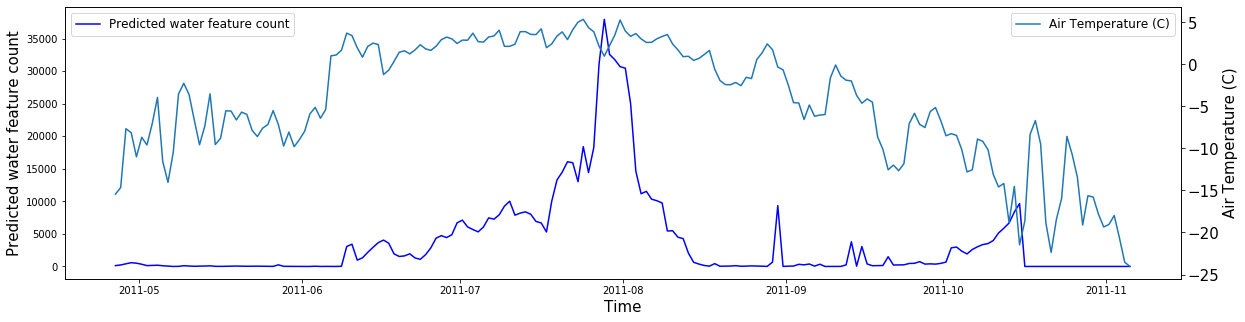

In [5]:
import matplotlib.pyplot as plt
predicted_water_feature_distribution = eo_patch.scalar_timeless['PREDICTED_WATER_MASK_COVERAGE']
temperature_distribution = temp_upe_data[['AirTemperature(C)']]
time = np.array(eo_patch.timestamp) # x axis
#t, w, h, _ = ndvi.shape 


fig, ax1 = plt.subplots(figsize=(20,5))

#plt.plot(predicted_water_feature_distribution, 's-', label = 'Predicted water feature count')
#plt.plot(time, predicted_water_feature_distribution, 'o-', label='Predicted water feature count')
#plt.plot(time,temperature_distribution, 's-', label = 'Air Temperature (C)')

ax2 = ax1.twinx()
ax1.plot(time, predicted_water_feature_distribution, 'b-', label='Predicted water feature count')
ax1.legend(loc=2, prop={'size': 12});

ax2.plot(time, temperature_distribution, '-', label = 'Air Temperature (C)')
ax2.legend(loc=1, prop={'size': 12});

ax1.set_ylabel('Predicted water feature count', fontsize=15)
ax2.set_ylabel('Air Temperature (C)', fontsize=15)

ax1.set_xlabel('Time', fontsize=15)
#plt.ylabel('Predicted water feature count', fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.legend(loc=2, prop={'size': 12});

#### 4. Plot analysis for all patches in 2011:

In [146]:
site.DATE_RANGES_MODIS[-1:]

[('2012-04-26', '2012-11-05')]

In [147]:
%%time
# application dataset building eotasks for all aval eopatches in the a eoworkflow
for date_range_modis in site.DATE_RANGES_MODIS[-1:]:
    print('Reading EOPatches from:', date_range_modis)
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[0], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_modis)
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    print(eopatches_filepath)
    predicted_water_feature_count = []
    for eopatch_name in list_of_available_patches:
        eo_patch = EOPatch.load(eopatches_filepath+eopatch_name)
        predicted_water_feature_count.append(eo_patch.scalar_timeless['PREDICTED_WATER_MASK_COVERAGE'])
        #del eo_patch
    

Reading EOPatches from: ('2012-04-26', '2012-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2012_04-2012_11/
Wall time: 3min 34s


In [148]:
predicted_water_feature_count[0].shape

(194,)

In [149]:
stacked_pwf = np.vstack( predicted_water_feature_count )

In [150]:
stacked_pwf.shape

(55, 194)

In [151]:
daily_sum_of_pwf = np.sum(stacked_pwf, axis=0)

In [152]:
daily_sum_of_pwf.shape

(194,)

In [153]:
np.sum(daily_sum_of_pwf)

31255337

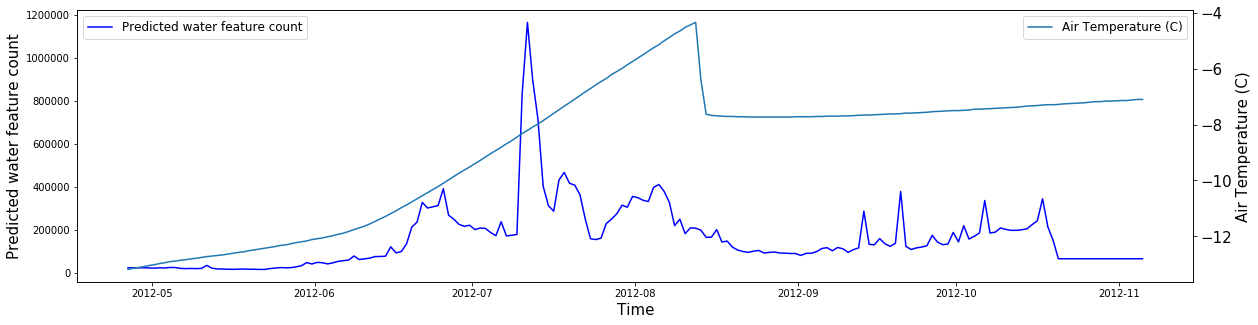

In [158]:
#import matplotlib.pyplot as plt
#predicted_water_feature_distribution = eo_patch.scalar_timeless['PREDICTED_WATER_MASK_COVERAGE']
temperature_distribution = temp_upe_data_2012[['IceTemperature8(C)']]
time = np.array(eo_patch.timestamp) # x axis
#t, w, h, _ = ndvi.shape 


fig, ax1 = plt.subplots(figsize=(20,5))

#plt.plot(predicted_water_feature_distribution, 's-', label = 'Predicted water feature count')
#plt.plot(time, predicted_water_feature_distribution, 'o-', label='Predicted water feature count')
#plt.plot(time,temperature_distribution, 's-', label = 'Air Temperature (C)')

ax2 = ax1.twinx()
ax1.plot(time, daily_sum_of_pwf, 'b-', label='Predicted water feature count')
ax1.legend(loc=2, prop={'size': 12});

ax2.plot(time, temperature_distribution, '-', label = 'Air Temperature (C)')
ax2.legend(loc=1, prop={'size': 12});

ax1.set_ylabel('Predicted water feature count', fontsize=15)
ax2.set_ylabel('Air Temperature (C)', fontsize=15)

ax1.set_xlabel('Time', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('plot_temp_vs_water_2012.png')

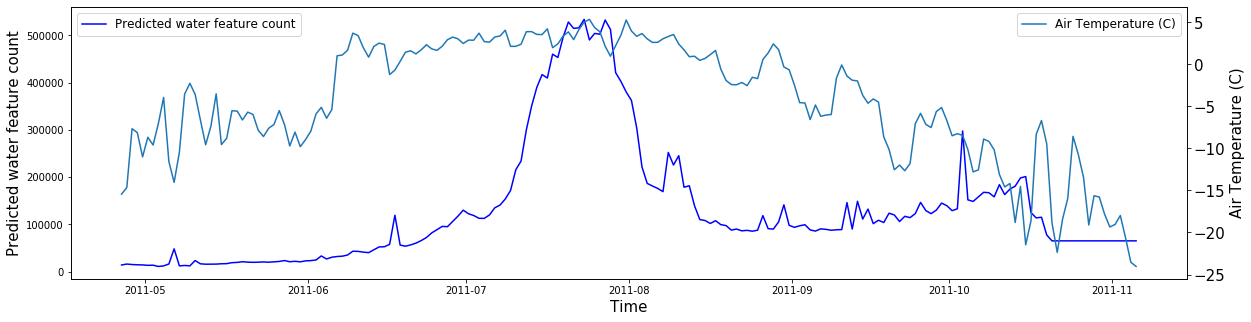

In [145]:
#import matplotlib.pyplot as plt
#predicted_water_feature_distribution = eo_patch.scalar_timeless['PREDICTED_WATER_MASK_COVERAGE']
temperature_distribution = temp_upe_data_2011[['AirTemperature(C)']]
time = np.array(eo_patch.timestamp) # x axis
#t, w, h, _ = ndvi.shape 


fig, ax1 = plt.subplots(figsize=(20,5))

#plt.plot(predicted_water_feature_distribution, 's-', label = 'Predicted water feature count')
#plt.plot(time, predicted_water_feature_distribution, 'o-', label='Predicted water feature count')
#plt.plot(time,temperature_distribution, 's-', label = 'Air Temperature (C)')

ax2 = ax1.twinx()
ax1.plot(time, daily_sum_of_pwf, 'b-', label='Predicted water feature count')
ax1.legend(loc=2, prop={'size': 12});

ax2.plot(time, temperature_distribution, '-', label = 'Air Temperature (C)')
ax2.legend(loc=1, prop={'size': 12});

ax1.set_ylabel('Predicted water feature count', fontsize=15)
ax2.set_ylabel('Air Temperature (C)', fontsize=15)

ax1.set_xlabel('Time', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('plot_temp_vs_water_2011.png')

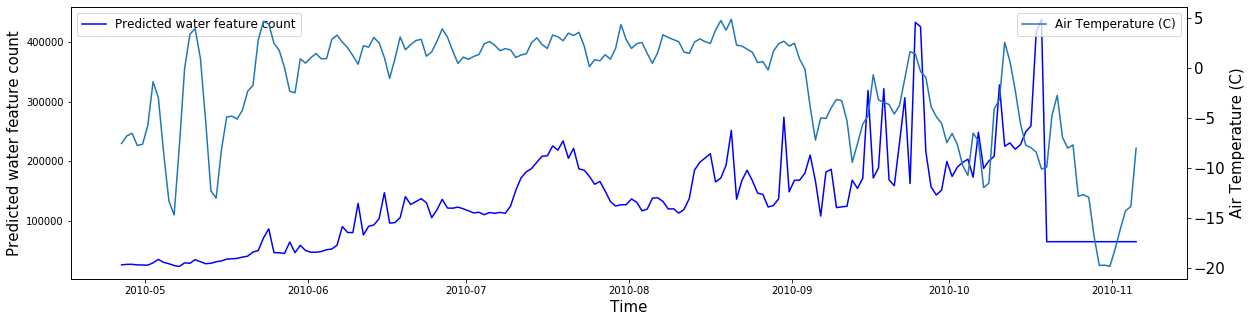

In [136]:
#import matplotlib.pyplot as plt
#predicted_water_feature_distribution = eo_patch.scalar_timeless['PREDICTED_WATER_MASK_COVERAGE']
temperature_distribution = temp_upe_data_2010[['AirTemperature(C)']]
time = np.array(eo_patch.timestamp) # x axis
#t, w, h, _ = ndvi.shape 


fig, ax1 = plt.subplots(figsize=(20,5))

#plt.plot(predicted_water_feature_distribution, 's-', label = 'Predicted water feature count')
#plt.plot(time, predicted_water_feature_distribution, 'o-', label='Predicted water feature count')
#plt.plot(time,temperature_distribution, 's-', label = 'Air Temperature (C)')

ax2 = ax1.twinx()
ax1.plot(time, daily_sum_of_pwf, 'b-', label='Predicted water feature count')
ax1.legend(loc=2, prop={'size': 12});

ax2.plot(time, temperature_distribution, '-', label = 'Air Temperature (C)')
ax2.legend(loc=1, prop={'size': 12});

ax1.set_ylabel('Predicted water feature count', fontsize=15)
ax2.set_ylabel('Air Temperature (C)', fontsize=15)

ax1.set_xlabel('Time', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('plot_temp_vs_water_2010.png')

In [ ]:
Without temperature for the years 2000-2008

In [104]:
site.DATE_RANGES_MODIS[-13:-4][0][0][:4]

'2000'

Reading EOPatches from: ('2000-04-26', '2000-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2000_04-2000_11/
water feature for year number 2000 : 15636328
Reading EOPatches from: ('2001-04-26', '2001-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2001_04-2001_11/
water feature for year number 2001 : 32736016
Reading EOPatches from: ('2002-04-26', '2002-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2002_04-2002_11/
water feature for year number 2002 : 45332378
Reading EOPatches from: ('2003-04-26', '2003-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2003_04-2003_11/
water feature for year number 2003 : 29979349
Reading EOPatches from: ('2004-04-26', '2004-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2004_04-2004_11/
water feature for year number 2004 : 20464461
Reading EOPatches from: ('2005-04-26', '2005-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2005_04-2005_11/
water feature for year number 2005 : 24823813
Reading EOPatches from

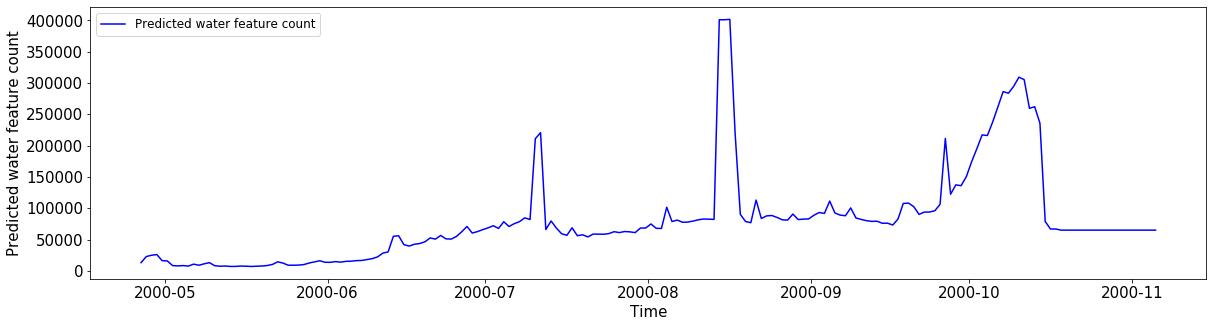

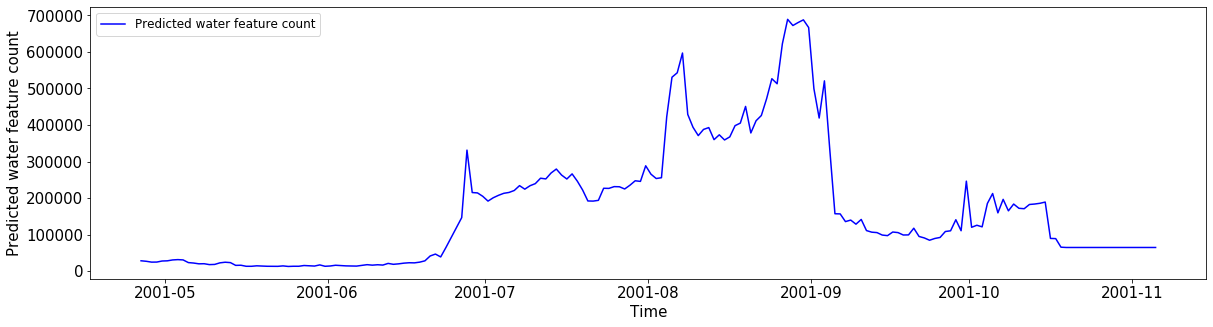

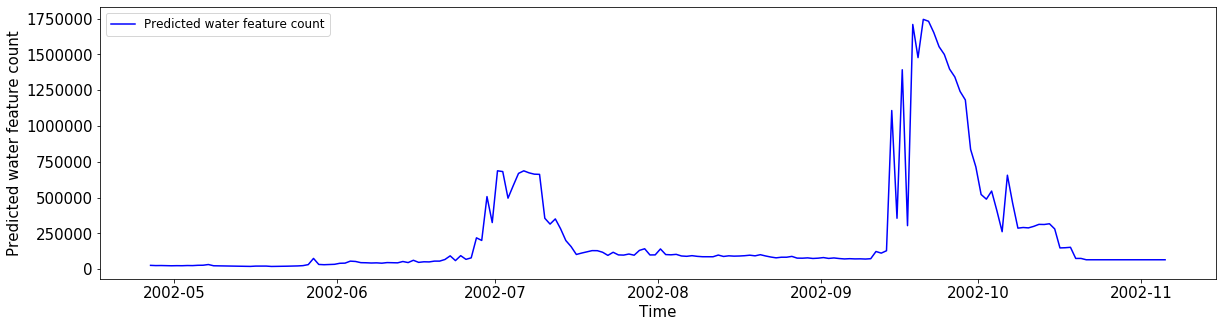

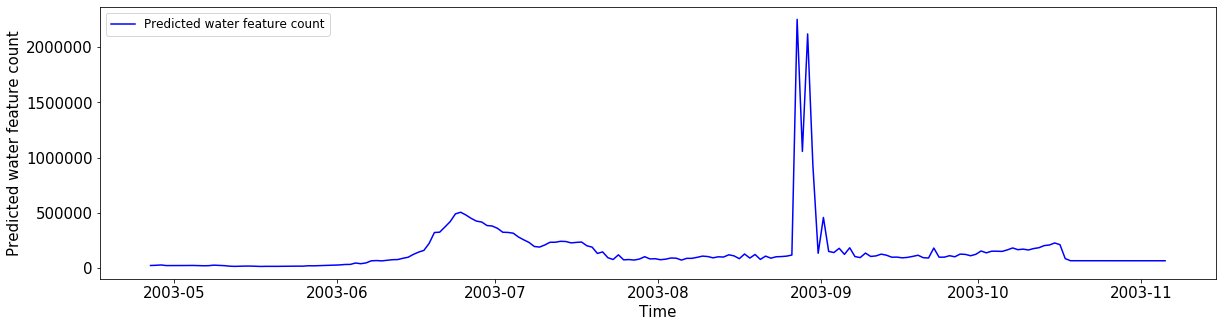

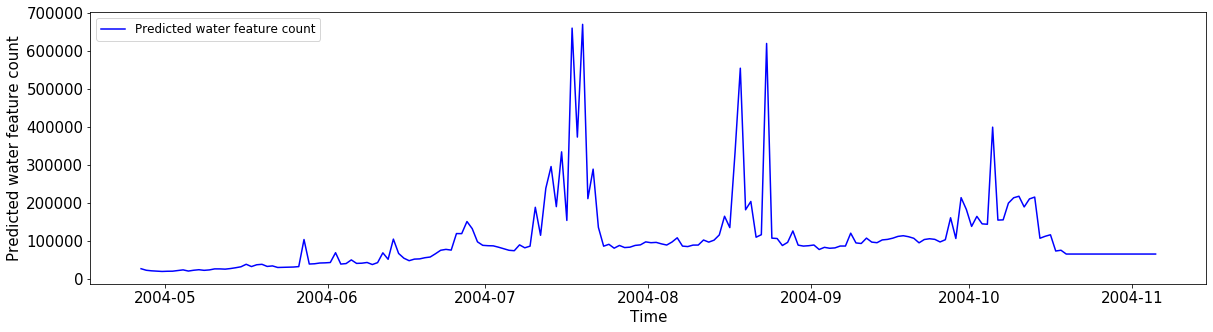

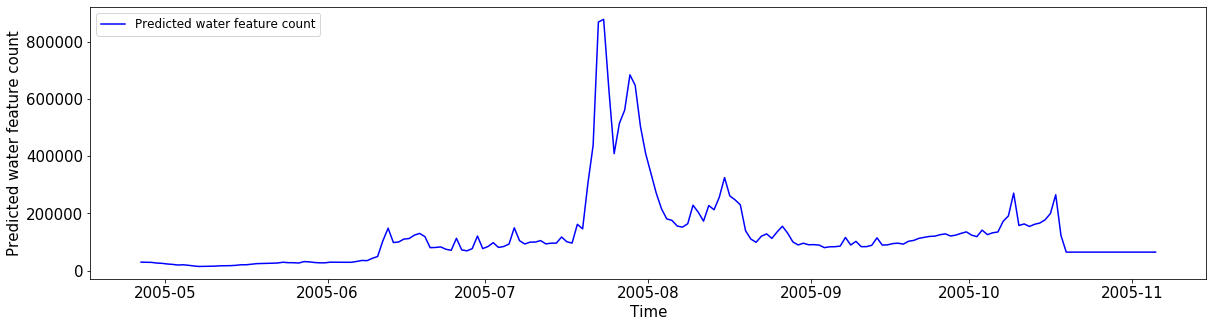

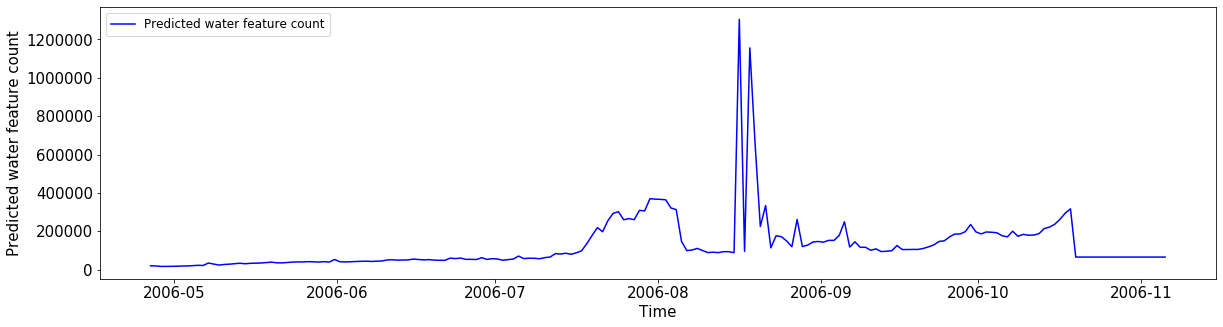

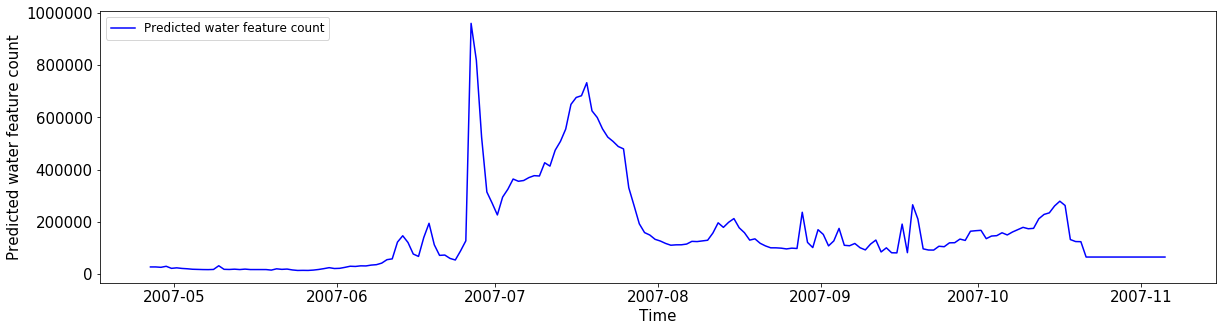

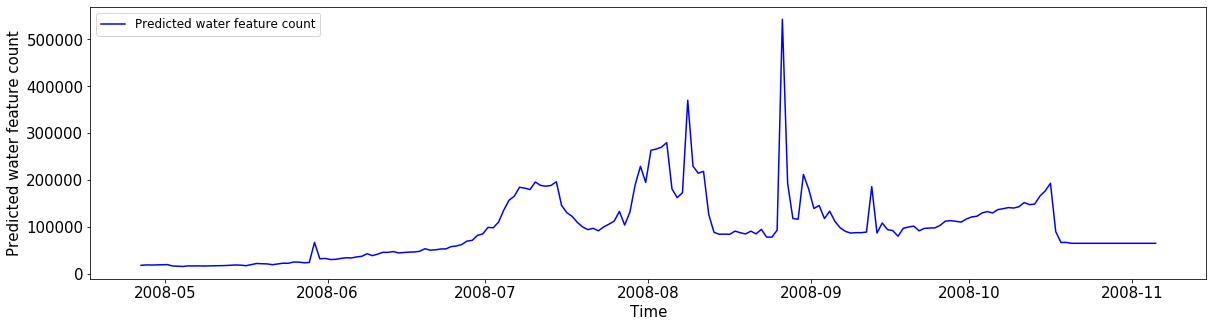

In [105]:
%%time
# application dataset building eotasks for all aval eopatches in the a eoworkflow
for date_range_modis in site.DATE_RANGES_MODIS[-13:-4]:
    print('Reading EOPatches from:', date_range_modis)
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[0], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_modis)
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    print(eopatches_filepath)
    predicted_water_feature_count = []
    for eopatch_name in list_of_available_patches:
        eo_patch = EOPatch.load(eopatches_filepath+eopatch_name)
        predicted_water_feature_count.append(eo_patch.scalar_timeless['PREDICTED_WATER_MASK_COVERAGE'])
        #del eo_patch
        
    stacked_pwf = np.vstack( predicted_water_feature_count )
    daily_sum_of_pwf = np.sum(stacked_pwf, axis=0)
    print('water feature for year number {} :'.format(date_range_modis[0][:4]), np.sum(daily_sum_of_pwf))
    print('top day per season {} :'.format(date_range_modis[0][:4]), np.max(daily_sum_of_pwf))
    time = np.array(eo_patch.timestamp)
    fig, ax1 = plt.subplots(figsize=(20,5))
    ax1.plot(time, daily_sum_of_pwf, 'b-', label='Predicted water feature count')
    ax1.legend(loc=2, prop={'size': 12});
    ax1.set_ylabel('Predicted water feature count', fontsize=15)
    ax1.set_xlabel('Time', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig('plot_temp_vs_water_{}.png'.format(str(date_range_modis[0][:4])))

In [155]:
%%time
# application dataset building eotasks for all aval eopatches in the a eoworkflow
for date_range_modis in site.DATE_RANGES_MODIS[-13:-4]:
    print('Reading EOPatches from:', date_range_modis)
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[0], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_modis)
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    print(eopatches_filepath)
    predicted_water_feature_count = []
    for eopatch_name in list_of_available_patches:
        eo_patch = EOPatch.load(eopatches_filepath+eopatch_name)
        predicted_water_feature_count.append(eo_patch.scalar_timeless['PREDICTED_WATER_MASK_COVERAGE'])
        #del eo_patch
        
    stacked_pwf = np.vstack( predicted_water_feature_count )
    daily_sum_of_pwf = np.sum(stacked_pwf, axis=0)
    print('water feature for year number {} :'.format(date_range_modis[0][:4]), np.sum(daily_sum_of_pwf))
    print('top day per season {} :'.format(date_range_modis[0][:4]), np.max(daily_sum_of_pwf))

Reading EOPatches from: ('2000-04-26', '2000-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2000_04-2000_11/
water feature for year number 2000 : 15636328
top day per season 2000 : 401588
Reading EOPatches from: ('2001-04-26', '2001-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2001_04-2001_11/
water feature for year number 2001 : 32736016
top day per season 2001 : 689101
Reading EOPatches from: ('2002-04-26', '2002-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2002_04-2002_11/
water feature for year number 2002 : 45332378
top day per season 2002 : 1745145
Reading EOPatches from: ('2003-04-26', '2003-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2003_04-2003_11/
water feature for year number 2003 : 29979349
top day per season 2003 : 2252828
Reading EOPatches from: ('2004-04-26', '2004-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2004_04-2004_11/
water feature for year number 2004 : 20464461
top day per season 2004 : 669198
Reading EOPatches 

In [156]:
%%time
# application dataset building eotasks for all aval eopatches in the a eoworkflow
for date_range_modis in site.DATE_RANGES_MODIS[-4:]:
    print('Reading EOPatches from:', date_range_modis)
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[0], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_modis)
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    print(eopatches_filepath)
    predicted_water_feature_count = []
    for eopatch_name in list_of_available_patches:
        eo_patch = EOPatch.load(eopatches_filepath+eopatch_name)
        predicted_water_feature_count.append(eo_patch.scalar_timeless['PREDICTED_WATER_MASK_COVERAGE'])
        #del eo_patch
        
    stacked_pwf = np.vstack( predicted_water_feature_count )
    daily_sum_of_pwf = np.sum(stacked_pwf, axis=0)
    print('water feature for year number {} :'.format(date_range_modis[0][:4]), np.sum(daily_sum_of_pwf))
    print('top day per season {} :'.format(date_range_modis[0][:4]), np.max(daily_sum_of_pwf))

Reading EOPatches from: ('2009-04-26', '2009-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2009_04-2009_11/
water feature for year number 2009 : 25586375
top day per season 2009 : 1122104
Reading EOPatches from: ('2010-04-26', '2010-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2010_04-2010_11/
water feature for year number 2010 : 25766980
top day per season 2010 : 437728
Reading EOPatches from: ('2011-04-26', '2011-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2011_04-2011_11/
water feature for year number 2011 : 25354627
top day per season 2011 : 533952
Reading EOPatches from: ('2012-04-26', '2012-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2012_04-2012_11/
water feature for year number 2012 : 31255337
top day per season 2012 : 1163811
Wall time: 15min 18s
